### Load the libraries needed

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
# load dataset
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Information about data

In [3]:
# check shape
df.shape

(1025, 14)

In [4]:
# target
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

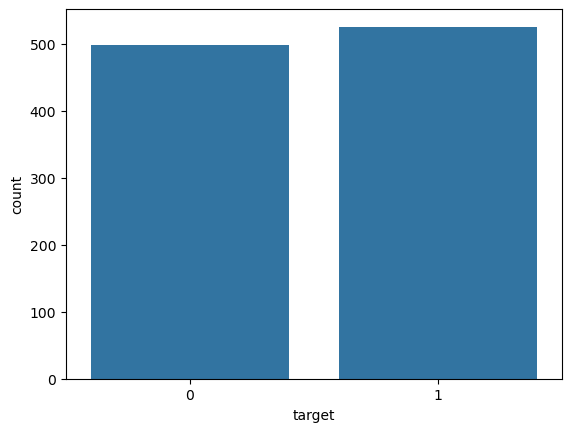

In [5]:
# plot a countplot
sns.countplot(x = "target", data = df)
plt.show()

### Split the data into **dependent** and **independent** variables

In [6]:
# split the data into independent (features) and dependent (target) label sets
x = df.drop("target", axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [7]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Split the data into training and testing part

In [8]:
# import train test split
from sklearn.model_selection import train_test_split

In [9]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 1)

In [10]:
len(train_x), len(test_x), len(train_y), len(test_y)

(820, 205, 820, 205)

### Train the model

In [11]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [12]:
# Create object
model = LogisticRegression(max_iter=1000)

In [13]:
# Pass the values to train the model
model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [14]:
predicted_y = model.predict(test_x)
predicted_y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0])

In [15]:
model.score(test_x, test_y)

0.8097560975609757

### Confusion matrix

In [16]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

In [17]:
# create confusion matrix
results = confusion_matrix(test_y, predicted_y)
results
# 79 + 85 = 165 correct predictions
# 11 + 30 = 41 wrong predictions

array([[80, 29],
       [10, 86]])

In [18]:
(79+85)/(79+30+11+85)

0.8